In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px
import pandas as pd
import src.data.notebook_utils as utils
from rdkit import Chem
from rdkit import DataStructs
plt.rcParams['figure.figsize'] = [6, 6]

In [4]:
%cd ..

/home/belu/VS Workplace/licentiate-thesis-repo


In [5]:
# familiaridad de aminas
# https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0302-y

In [18]:
data_path = 'data/preproccess/no_constant_training.csv'

df = utils.read_data()

df_selected_feat = pd.read_csv(data_path)

In [19]:
len(df_selected_feat.columns)

44

In [20]:
len(df.columns)

77

In [21]:
continous_feat = ['_feat_molsurfaceareaVDWp', '_feat_maximalprojectionsize', '_feat_MinimalProjectionArea', '_feat_minimalprojectionsize', '_feat_MaximalProjectionArea', '_feat_MolPol', '_feat_ASA_P', '_feat_msareaVDWp', '_feat_ASA', '_feat_ASA-', '_feat_MinimalProjectionRadius', '_feat_molsurfaceareaASAp', '_feat_LengthPerpendicularToTheMinArea', '_feat_WienerIndex', '_feat_ASA+', '_feat_MaximalProjectionRadius', '_feat_VanderWaalsSurfaceArea', '_feat_LengthPerpendicularToTheMaxArea', '_feat_VanderWaalsVolume', '_feat_BalabanIndex', '_feat_ASA_H', '_feat_HyperWienerIndex', '_feat_msareaASAp', '_feat_Refractivity', '_feat_AvgPol']

In [22]:
df_one_amine = pd.read_csv("data/preproccess/only_one_amine.csv")
df_one_amine = df_one_amine[df.columns]
len(df_one_amine.columns)

/home/belu/.local/share/virtualenvs/licentiate-thesis-repo-cz9ujhZI/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (86,138,140,144,145,146,149,150,169,172,175,177,178,180,181,182,183,184,185,191,192,193,196,197,201,202,203,206,207,211,212,213,216,217,281,283,284,285,286,287,288,344,345,346,349,350,354,355,356,359,360,429,431,432,433,434,435,436,489,491,493,494,496,498,499,501,503,520,532,534,535,557,559,561,586,589,592,594,595,597,618,619,620,623,624,644,647,650,652,653,655,656,657,658,659,660,668,669,670,673,674,694,697,700,702,703,705,706,707,708,709,710,716) have mixed types.Specify dtype option on import or set low_memory=False.



77

In [23]:
df = pd.concat([df, df_one_amine], axis='index')


In [24]:
amine_col = utils.get_columns(df_selected_feat.columns)['_feat_']
amine_df = df[amine_col]
amine_info = df[['_rxn_organic-inchikey']]
amine_all = pd.concat([amine_df, amine_info], axis='columns')
amine_df = amine_all.drop_duplicates()

In [25]:
len(df)

5299

In [26]:
len(amine_df)

28

In [27]:
chemical_names = utils.read_chemical_info()
chemical_names.head()

,Chemical Name,Chemical Abbreviation,Molecular Weight (g/mol),Density (g/mL),InChI=,InChI Key (ID),Chemical Category,Canonical SMILES String,Molecular Formula,PubChem ID,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamma-Butyrolactone,GBL,86.09,1.12,InChI=1S/C4H6O2/c5-4-2-1-3-6-4/h1-3H2,YEJRWHAVMIAJKC-UHFFFAOYSA-N,solvent,C1CC(=O)OC1,C4H6O2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dimethyl sulfoxide,DMSO,78.13,1.10,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,solvent,CS(=O)C,C2H6OS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Formic Acid,FAH,46.03,1.22,"InChI=1S/CH2O2/c2-1-3/h1H,(H,2,3)",BDAGIHXWWSANSR-UHFFFAOYSA-N,acid,C(=O)O,CH2O2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lead Diiodide,PbI2,461.01,6.16,InChI=1S/2HI.Pb/h2*1H;/q;;+2/p-2,RQQRAHKHDFPBMC-UHFFFAOYSA-L,inorganic,I[Pb]I,PbI2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
chemical_names.columns

Index(['Chemical Name', 'Chemical Abbreviation', 'Molecular Weight (g/mol)',
       'Density            (g/mL)', 'InChI=', 'InChI Key (ID)',
       'Chemical Category', 'Canonical SMILES String', 'Molecular Formula',
       'PubChem ID', 'ECL Chemical id', 'ECL Product id',
       'Catalog description', 'Synonyms', 'Catalog number',
       'Sigma-Aldrich URL', 'Primary Information Source', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')

In [29]:
amine_cols_info = ['Chemical Abbreviation', 'InChI=', 'InChI Key (ID)', 'Canonical SMILES String']
chemical_names = chemical_names[amine_cols_info].dropna()

In [30]:
df_amine_with_names = amine_df.join(chemical_names.set_index('InChI Key (ID)'), on= '_rxn_organic-inchikey', how='inner')


In [31]:
df_amine_with_names.columns[67:]

Index([], dtype='object')

In [32]:
amine_df = df_amine_with_names.drop(['Chemical Abbreviation', 'InChI=', '_rxn_organic-inchikey', 'Canonical SMILES String'], axis='columns')

In [33]:
#amine_df['index'] = abb_amines_names
#amine_df.set_index('index').to_csv('amines_fcp.csv')

In [34]:
amine_df = amine_df[continous_feat] 

In [35]:
X = StandardScaler().fit_transform(amine_df)

In [21]:
def explore_dbscan(X, range_distance):
    clusters_size = np.zeros(range_distance.shape[0])
    for num, distance in enumerate(range_distance):
        db = DBSCAN(eps=distance, min_samples=1).fit(X)
        clusters_size[num] = len(set(db.labels_))
    return pd.DataFrame({'distance': range_distance, 'cluster size': clusters_size})


In [22]:
def plot_scatter(x_column, y_column, x_label, y_label):
    ax = sns.scatterplot(x=x_column, y=y_column)
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.show()

In [23]:
explore_dbscan_1_to_11 = explore_dbscan(X, np.arange(1,16,0.5))

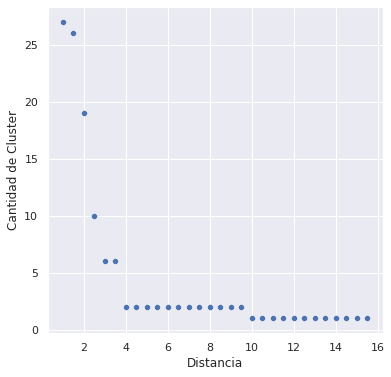

In [24]:
plot_scatter(explore_dbscan_1_to_11['distance'], explore_dbscan_1_to_11['cluster size'], 'Distancia', 'Cantidad de Cluster')

In [26]:
def dbsc_label(X, distance):
    db = DBSCAN(eps=distance, min_samples=1).fit(X)
    return db.labels_

In [41]:
cluster = dbsc_label(X, 3)
cluster

array([0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0,
       0, 5, 1, 0, 1])

In [42]:
df_amine_with_names['cluster'] = cluster

In [43]:
df_amine_with_names.query('cluster == 0')['Chemical Abbreviation']


0                     IPentylammoniumIodide
1                                  n-BuNH3I
4                     iPropylammoniumIodide
5                     Diethylammoniumiodide
6                 Diisopropylammoniumiodide
7                      nHexylammoniumIodide
8                      iButylammoniumIodide
9              4MethoxyPhenylammoniumIodide
10                  neoPentylammoniumIodide
11                    NPropylammoniumIodide
14           CyclohexylmethylammoniumIodide
15                     tButylammoniumIodide
18                     BenzylammoniumIodide
22           4FluoroPhenethylammoniumIodide
33              4FluoroPhenylammoniumIodide
36                     PhenylammoniumIodide
53     4TrifluoromethylBenzylammoniumIodide
60     4TrifluoromethylPhenylammoniumIodide
70                  TertOctylammoniumIodide
187                                PhEtNH3I
Name: Chemical Abbreviation, dtype: object

In [23]:
df_amine_with_names.query('cluster == 2')['Chemical Abbreviation']

3           4methoxyphenethylammoniumiodide
9              4MethoxyPhenylammoniumIodide
18                     BenzylammoniumIodide
22           4FluoroPhenethylammoniumIodide
33              4FluoroPhenylammoniumIodide
36                     PhenylammoniumIodide
53     4TrifluoromethylBenzylammoniumIodide
60     4TrifluoromethylPhenylammoniumIodide
187                                PhEtNH3I
Name: Chemical Abbreviation, dtype: object

In [24]:
df_amine_with_names.query('cluster == 5')['Chemical Abbreviation']


78    nDodecylammoniumIodide
Name: Chemical Abbreviation, dtype: object

In [25]:
df_amine_with_names.query('cluster == 3')['Chemical Abbreviation']


14    CyclohexylmethylammoniumIodide
Name: Chemical Abbreviation, dtype: object

In [26]:
df_amine_with_names.query('cluster == 1 or cluster >= 3')['Chemical Abbreviation']


2                                   GnNH3I
14          CyclohexylmethylammoniumIodide
46      NNDiethylpropane13diammoniumiodide
78                  nDodecylammoniumIodide
109                    FormamidiniumIodide
1811                     ImidazoliumIodide
Name: Chemical Abbreviation, dtype: object

In [27]:
chemical_names = utils.read_chemical_info()

In [28]:
cluster

array([0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 4, 2, 2,
       0, 5, 6, 2, 7])

## Clusterization by Amines structural similarities

In [45]:
smile_col = 'Canonical SMILES String'
amines_smiles = df_amine_with_names[smile_col]

In [46]:
abb_amines_names = df_amine_with_names['Chemical Abbreviation'].str.replace('ammoniumIodide', '')
abb_amines_names = abb_amines_names.str.replace('ammoniumiodide', '').to_list()

In [47]:

def calculate_amine_fingerprint_distance(amines_smiles, amines_names, structure_metric):
    """
        Heatmap for amine similarity by structure distance method.
        amines_smiles: vector of amines by SMILE code.
        structure_metric: {'Tanimoto', 'Dice', 'BulkTanimoto'}
        TODO: Add more DataStructs Similarity Metric.
    """
    metrics={
        'Tanimoto': DataStructs.TanimotoSimilarity,
        'Dice': DataStructs.DiceSimilarity,
        'BulkTanimoto': DataStructs.BulkTanimotoSimilarity
    }
    
    amines_molecules = [Chem.MolFromSmiles(smile) for smile in amines_smiles]
    amines_fingerprints = [Chem.RDKFingerprint(x) for x in amines_molecules]
    size = len(amines_names)
    similarity_array = np.zeros((size,size))

    for index1, mole1 in enumerate(amines_fingerprints):
        for index2, mole2 in enumerate(amines_fingerprints):
            similarity_array[index1,index2] = DataStructs.FingerprintSimilarity(mole1,mole2, metrics[structure_metric])
    
    return similarity_array

In [49]:
#pd.DataFrame(similarity_tanimoto, abb_amines_names).to_csv('similarity_tanimoto.csv')

In [53]:
similarity_tanimoto = calculate_amine_fingerprint_distance(amines_smiles, abb_amines_names, 'Tanimoto')
plot_heatmap_plotly(similarity_tanimoto, abb_amines_names, 'Similaridad Estructural de Aminas', 'centroid', 'Coff Tanimoto')


In [38]:
similarity_tanimoto = calculate_amine_fingerprint_distance(amines_smiles, abb_amines_names, 'Dice')
plot_heatmap_plotly(similarity_tanimoto, abb_amines_names, 'Similaridad Aminas', 'centroid', 'Coff Dice')


- ciclohexil 
    - estructuralmente a alifaticos
    - por PF debería ir en Otros..en pca según el eje que diferencia ambos cluster, debería ir cerca de alifaticos (no tanto)
- NNdie 
    - estructuralmente: cadenas carbonadas
    - PF según PCA3 se alejaba...
    - como es la de menos variabilidad y dado que por PCA2 queda marcadamente en grupo carbonado -> a grupo carbonado
- ndodecyl estructuralmente debería ir a carbonados, pero como según PCA1 quedó lejísimos de tanto ambos cluster -> sigue en OTROS

In [34]:
df_amine_with_names.query('cluster == 1 or cluster >= 3')['Chemical Abbreviation']


2                                   GnNH3I
14          CyclohexylmethylammoniumIodide
46      NNDiethylpropane13diammoniumiodide
78                  nDodecylammoniumIodide
109                    FormamidiniumIodide
1811                     ImidazoliumIodide
Name: Chemical Abbreviation, dtype: object

In [35]:
df_amine_with_names.query('cluster == 1 or cluster == 6')['Chemical Abbreviation']

2                   GnNH3I
109    FormamidiniumIodide
Name: Chemical Abbreviation, dtype: object

In [278]:
df_amine_with_names.query('cluster == 5')['Chemical Abbreviation']


14    NNDiethylpropane13diammoniumiodide
Name: Chemical Abbreviation, dtype: object

In [342]:
df_amine_with_names.query('cluster == 3')['Chemical Abbreviation']


14    CyclohexylmethylammoniumIodide
Name: Chemical Abbreviation, dtype: object

In [281]:
df_amine_with_names.query('cluster == 7')['Chemical Abbreviation']


155    nDodecylammoniumIodide
Name: Chemical Abbreviation, dtype: object

In [279]:
df_amine_with_names.query('cluster == 8')['Chemical Abbreviation']


1696    ImidazoliumIodide
Name: Chemical Abbreviation, dtype: object

In [36]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as pyo

from scipy.spatial.distance import pdist, squareform

import scipy.cluster.hierarchy as sch

pyo.init_notebook_mode(connected=True)

def plot_heatmap_plotly(numpy_array, columns, title, dendogramMethod='centroid', colorbar_title = 'Correlación (Abs)'):
    data_array = numpy_array
    labels = columns
    colorScale = 'default'
   
    # Initialize figure by creating upper dendrogram
    #fig = ff.create_dendrogram(data_array, orientation='bottom', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, metric=distanceMethod ,optimal_ordering=True), labels=labels)
    fig = ff.create_dendrogram(data_array, orientation='bottom', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, optimal_ordering=True), labels=labels)
    for i in range(len(fig['data'])):
        fig['data'][i]['yaxis'] = 'y2'

    # Create Side Dendrogram
    #dendro_side = ff.create_dendrogram(data_array, orientation='right', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, metric=distanceMethod,  optimal_ordering=True) )
    dendro_side = ff.create_dendrogram(data_array, orientation='right', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, optimal_ordering=True) )

    for i in range(len(dendro_side['data'])):
        dendro_side['data'][i]['xaxis'] = 'x2'

    # Add Side Dendrogram Data to Figure
    # ~ stack1 = []
    for data in dendro_side['data']:
        fig.add_trace(data)


    # Create Heatmap
    dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
    dendro_leaves = list(map(int, dendro_leaves))
    heat_data = data_array
    heat_data = heat_data[dendro_leaves,:]
    heat_data = heat_data[:,dendro_leaves]

    if(colorScale!='default'):
        aux=go.Heatmap(
            x = dendro_leaves,
            y = dendro_leaves,
            z = heat_data,
            colorscale = colorScale,
            colorbar=dict(title='Trie distances'),
            )
        heatmap = [aux]
    else:
        aux = go.Heatmap(
            x=dendro_leaves,
            y=dendro_leaves,
            z=heat_data,
            colorbar=dict(title=colorbar_title),
        )
        heatmap = [aux]
        # heatmap = [
        # 	go.Heatmap(
        # 		x = dendro_leaves,
        # 		y = dendro_leaves,
        # 		z = heat_data
        # 	)
        # ]
	
    heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
    heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']
    # Add Heatmap Data to Figure
    for data in heatmap:
        fig.add_trace(data)


    # Edit Layout
    fig.update_layout({'width':800, 'height':800,
                            'showlegend':False, 'hovermode': 'closest',
                            })

    fig.update_layout(title={
                        'text': title,
                        'y':0.9,
                        'x':0.55,
                        'xanchor': 'center',
                        'yanchor': 'top'})

    # Edit xaxis
    fig.update_layout(xaxis={'domain': [.15, 1],
                                    'mirror': False,
                                    'showgrid': False,
                                    'showline': False,
                                    'zeroline': False,
                                    'ticks':""})
    # Edit xaxis2
    fig.update_layout(xaxis2={'domain': [0, .15],
                                    'mirror': False,
                                    'showgrid': False,
                                    'showline': False,
                                    'zeroline': False,
                                    'showticklabels': False,
                                    'ticks':""})

    # Edit yaxis
    fig.update_layout(yaxis={'domain': [0, .85],
                                    'mirror': False,
                                    'showgrid': False,
                                    'showline': False,
                                    'zeroline': False,
                                    'showticklabels': False,
                                    'ticks': ""
                            })
    # Edit yaxis2
    fig.update_layout(yaxis2={'domain':[.825, .975],
                                        'mirror': False,
                                        'showgrid': False,
                                        'showline': False,
                                        'zeroline': False,
                                        'showticklabels': False,
                                        'ticks':""})
    # ~ print(fig)
    fig['layout']['yaxis']['ticktext'] = fig['layout']['xaxis']['ticktext']
    fig['layout']['yaxis']['tickvals'] = fig['layout']['xaxis']['tickvals']


    #fig.show()

    pyo.iplot(fig, filename='test')

In [282]:
df_amine_with_names[df_amine_with_names['Chemical Abbreviation'] == 'AcNH3I']['_rxn_organic-inchikey']

1    GGYGJCFIYJVWIP-UHFFFAOYSA-N
Name: _rxn_organic-inchikey, dtype: object

0.6

## Visualization

### PCA 

In [37]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components, svd_solver = 'auto')
    principal_components=pca.fit_transform(df)
    pca_columns = ['PCA_'+ str(n) for n in range(1,n_components+1)]
    pca_df = pd.DataFrame(data = principal_components, columns = pca_columns)
    return pca_df, pca


In [38]:
def plot_3d_cluster(reduced_df, cluster_ids, name_color, method='PCA'):
    reduced_df[name_color] = cluster_ids
    reduced_df[name_color] = reduced_df[name_color].astype(str)
    if method == 'PCA':
        fig = px.scatter_3d(reduced_df, x='PCA_1', y='PCA_2', z='PCA_3',
                    color=name_color)
    else:
        fig = px.scatter_3d(reduced_df, x='TSNE_1', y='TSNE_2', z='TSNE_3',
            color=name_color)
    fig.show()


Transformed amines to 3 components

In [39]:
amine_3_components_pca = apply_pca(X, 3)

In [40]:
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html dendogramMethod

def plot_heap_map_with_dendogram(data, cols, rows, title, dendogramMethod='weighted'):
    data_array = data
    labels = cols
    colorScale = 'default'

    # Add upper dendogram
    fig = ff.create_dendrogram(data.transpose(), orientation='bottom', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, optimal_ordering=True), labels=labels)
    for i in range(len(fig['data'])):
        fig['data'][i]['yaxis'] = 'y2'

    # Create Side Dendrogram to aux calculation in heatmap
    #dendro_side = ff.create_dendrogram(data_array, orientation='right', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, metric=distanceMethod,  optimal_ordering=True) )
    dendro_side = ff.create_dendrogram(data.transpose(), orientation='right', linkagefun=lambda x: sch.linkage(x, method=dendogramMethod, optimal_ordering=True) )

    for i in range(len(dendro_side['data'])):
        dendro_side['data'][i]['xaxis'] = 'x2'
   
    # Delete side dendograms
    # for data in dendro_side['data']:
     #   fig.add_trace(data)
    
    # Create and add heatmap
    dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
    dendro_leaves = list(map(int, dendro_leaves))
    heat_data = data_array
    heat_data = heat_data[:,dendro_leaves]
    heatmap = go.Heatmap(
        z = heat_data,
        colorbar = {'len':0.8, 'nticks':15, 'title':'loadings'},
        colorscale='Blackbody',
    )
    heatmap['y'] = [n for n in range(8)] 
    heatmap['x'] = fig['layout']['xaxis']['tickvals']
   
    fig.add_trace(heatmap)

    fig.update_layout({'width':1200, 'height':800,
                        'showlegend':False,
                        'boxmode': 'group',
                        })

        # Edit xaxis
    fig.update_layout(xaxis={'domain': [1, 1],
                                    'mirror': False,
                                    'showgrid': False,
                                    'showline': False,
                                    'zeroline': False,
                                    'ticks':""})
    # Edit xaxis2
    fig.update_layout(xaxis2={'domain': [1, .8],
                                    'mirror': False,
                                    'showgrid': False,
                                    'showline': False,
                                    'zeroline': False,
                                    'showticklabels': False,
                                    'ticks':""})

    # Edit yaxis
      # Edit yaxis
    fig.update_layout(yaxis={'domain': [0.1, 0.8],
                                'mirror': False,
                                'showgrid': False,
                                'showline': False,
                                'zeroline': False,
                                'showticklabels': True,
                                'tickmode':'array',
                                'ticks': "",
                                'title': 'Componente PCA'
                        })
    # Edit yaxis2
    fig.update_layout(yaxis2={'domain':[0.8, 1],
                            'mirror': False,
                            'showgrid': False,
                            'showline': False,
                            'zeroline': False,
                            'showticklabels': False,
                            'ticks':""})

    fig.update_layout(title={
                    'text': title,
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})

    fig['layout']['yaxis']['ticktext'] = ['PCA '+str(n) for n in range(1,9)] 
    fig['layout']['yaxis']['tickvals'] = [n for n in range(0,8)] 


    fig.show()

In [48]:
def plot_cluster_amine(X, amine_3_components, distance, method):
    labels = dbsc_label(X, distance)
    plot_3d_cluster(amine_3_components, labels, 'cluster_ID', method)


In [49]:
plot_cluster_amine(X, amine_3_components_pca, distance = 3, method='PCA')
# oversampling y undersampling
# agregar col extra de cluster
# considerar que los ejes de PCA su rango no es el mismo
# no es necesaro separarlos


In [55]:
#incluye amina sola 
plot_3d_cluster(amine_3_components_pca[0], list(df_amine_with_names['Chemical Abbreviation'].values), 'ID', "PCA")

In [50]:

def apply_tsne(df, n_components, perplexity):
    tsne_3d = TSNE(n_components=3, perplexity=perplexity)
    TCs_3d = tsne_3d.fit_transform(df)
    tsne_columns = ['TSNE_'+ str(n) for n in range(1,n_components+1)]
    tsne_df = pd.DataFrame(data = TCs_3d, columns = tsne_columns)
    return tsne_df


In [51]:
def explore_tsne(X, range_distance):
    clusters_size = np.zeros(range_distance.shape[0])
    for num, distance in enumerate(range_distance):
        db = DBSCAN(eps=distance, min_samples=1).fit(X)
        clusters_size[num] = len(set(db.labels_))
    return pd.DataFrame({'distance': range_distance, 'cluster size': clusters_size})


explore_tsne_1_to_11 = explore_tsne(X, np.arange(5,50,2))

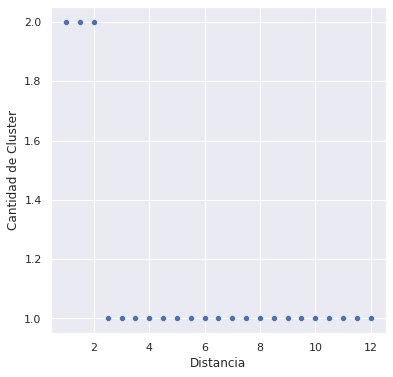

In [52]:
plot_scatter(explore_dbscan_1_to_11['distance'], explore_tsne_1_to_11['cluster size'], 'Distancia', 'Cantidad de Cluster')

In [55]:
plot_cluster_amine(X, apply_tsne(X, 3,100), distance = 3, method='TSNE')


In [58]:
amine_3_components_pca, pca = apply_pca(X, 3)
rows = [ "PCA"+str(x) for x in range(1,3)]
plot_heap_map_with_dendogram(pca.components_, amine_df.columns.to_list(), rows, 'Propiedades físico-químicas')